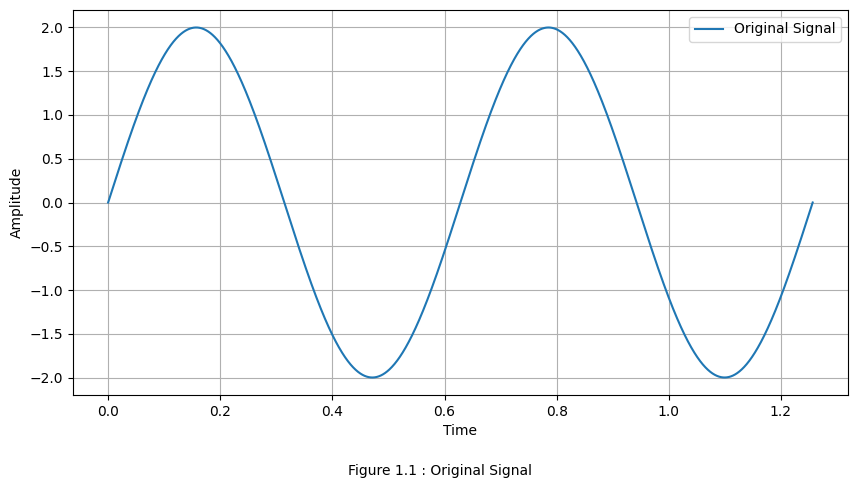

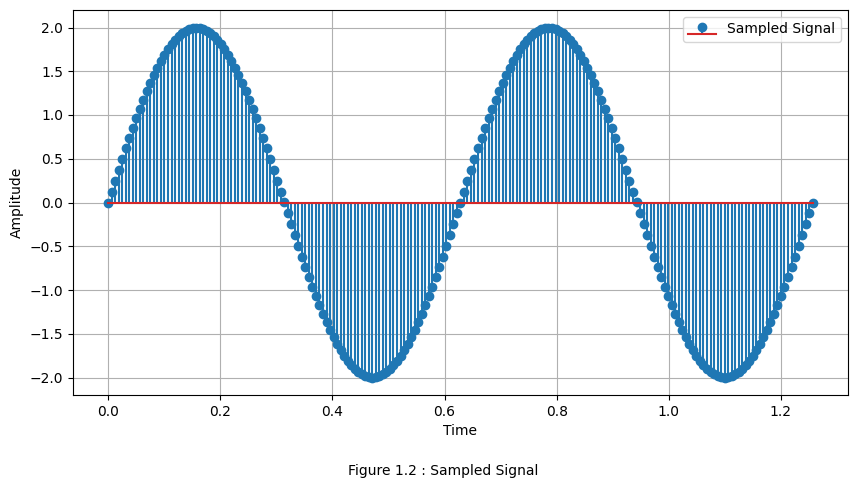

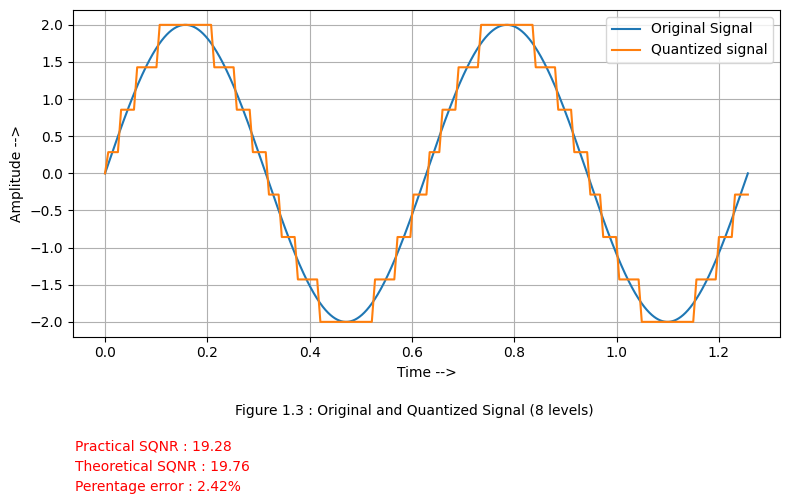

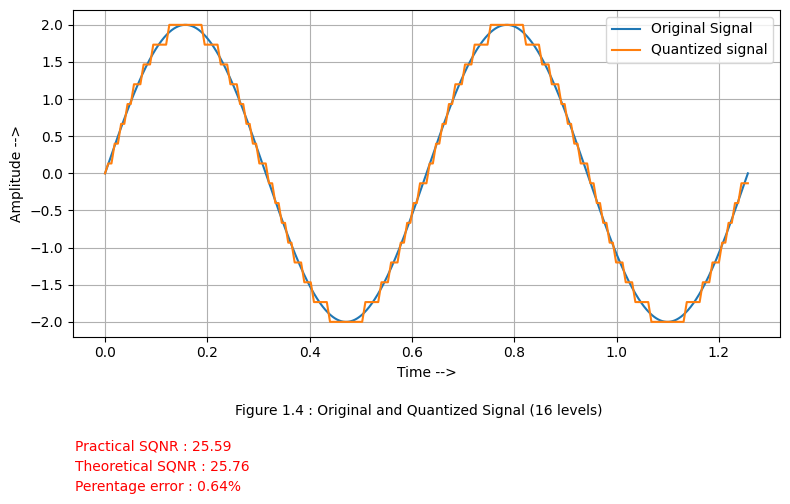

Quantized Table (8 levels) :
      Levels
1  0.285714
2  0.857143
3  1.428571
4  2.000000
5 -0.285714
6 -0.857143
7 -1.428571
8 -2.000000 

Quantized Table (16 levels) :
       Levels
1   0.133333
2   0.400000
3   0.666667
4   0.933333
5   1.200000
6   1.466667
7   1.733333
8   2.000000
9  -0.133333
10 -0.400000
11 -0.666667
12 -0.933333
13 -1.200000
14 -1.466667
15 -1.733333
16 -2.000000 

Encoded Dataframe (8 levels) :
    quantization level Binary Representation
0            0.285714             [0, 0, 0]
1            0.857143             [0, 0, 1]
2            1.428571             [0, 1, 0]
3            2.000000             [0, 1, 1]
4           -0.285714             [1, 0, 0]
5           -0.857143             [1, 0, 1]
6           -1.428571             [1, 1, 0]
7           -2.000000             [1, 1, 1] 

Encoded Dataframe (16 levels) :
     quantization level Binary Representation
0             0.133333          [0, 0, 0, 0]
1             0.400000          [0, 0, 0, 1]
2       

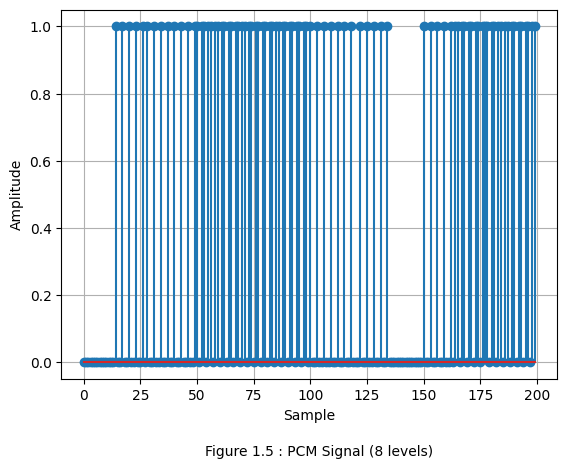

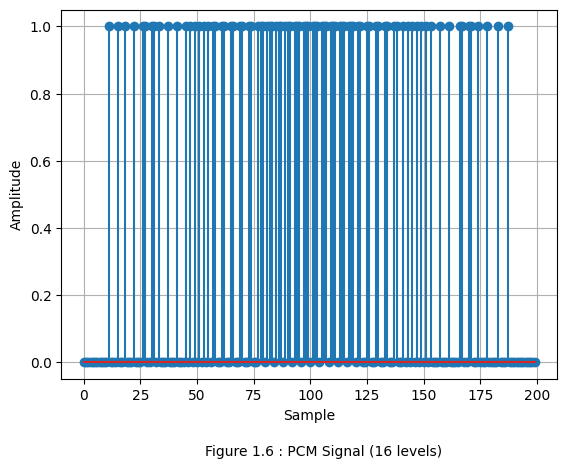

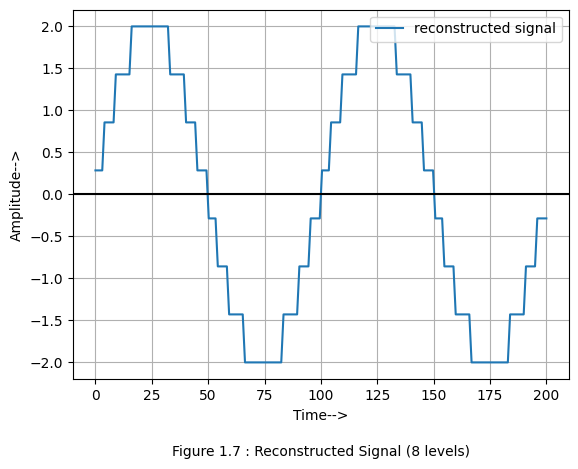

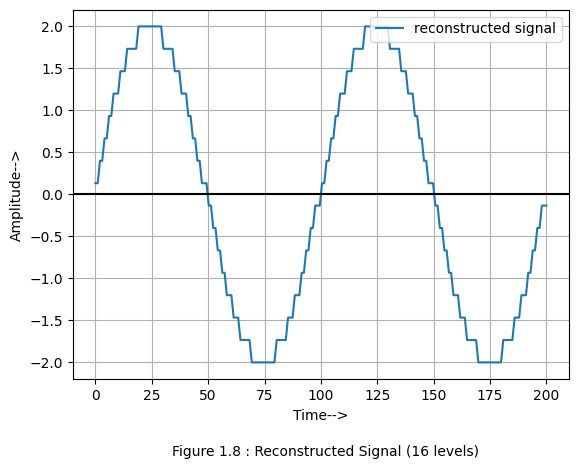

In [2]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import pandas as pd

# Function to generate a sinusoidal signal
def generate_signal(A, W, t):
    t = np.linspace(0,2* t,5000)
    signal = A * np.sin(W * t)
    return t, signal

def rounding(value):
    answer = mt.floor(value) + mt.ceil(value)
    return answer / 2

# Function to quantize the signal
def uniform_quantization(signal, levels):
    step_size = 2 * max(signal) / (levels-1)
    quantized_signal = [rounding(i / step_size) * step_size for i in signal]
    return quantized_signal

# Function to calculate SQNR practically
def calculate_sqnr(original_signal, quantized_signal):
    signal_power = np.mean(np.square(original_signal))
    noise_power = np.mean(np.square(original_signal - quantized_signal))
    sqnr = 10 * np.log10(signal_power / noise_power)
    return sqnr

# Function to calculate the SQNR theoretically
def theoretical_sqnr(bits):
    return (6 *bits) + 1.76

# Function to represent the quantisation levels in tabular form
def table_rep(Signal): 
    table_dict = {'Levels':Signal}
    table_df = pd.DataFrame(table_dict)
    table_df = table_df.drop_duplicates().reset_index(drop=True)
    table_df = table_df.drop(0)
    return table_df

# Function to give a binary number to every quantization level
def binary_rep(level,bits):
    binary_numbers = []
    for i in range(level):
        num = bin(i)[2:].zfill(bits) 
        binary_array = [int(j) for j in num]   
        binary_numbers.append(binary_array)
    return binary_numbers

levels = [8,16]  # Quantization levels
bits = [] #The number of bits 
for level in levels:
    bit = int(np.log2(level))
    bits.append(bit)   # The number of bits corresponding to a particular level
A = 2   # Amplitude of the sinusoidal signal
W_signal = 10 # Frequency of the sinusoidal signal
W_sampling = 1000 # Nyquist criteria W_samling>=2*W_ss
T_cycle = 2 *np.pi / W_signal # Time period of the signal

t_signal, signal = generate_signal(A, W_signal, T_cycle)

f_sampling = W_sampling / (2 * np.pi)  # Sampling frequency
T_sampling = 1 / f_sampling # Sampling Period
t_sampling = np.arange(0, 200 * T_sampling, T_sampling) 

sampled_signal = A * np.sin(W_signal * t_sampling) #Sampled signal

fig_index=1

# Plotting the original signal
plt.figure(figsize=(10, 5))
plt.plot(t_signal, signal, label='Original Signal')
plt.figtext(0.4,-0.05,f'Figure 1.{fig_index} : Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()
fig_index+=1

# Plotting the sampled signal
plt.figure(figsize=(10, 5))
plt.stem(t_sampling,sampled_signal , label='Sampled Signal')
plt.figtext(0.4,-0.05,f'Figure 1.{fig_index} : Sampled Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()
fig_index+=1

quantized_signal_array = []
for level in levels:
    quantized_signal = uniform_quantization(sampled_signal,level)
    quantized_signal_array.append(quantized_signal)

    practical_SQNR = calculate_sqnr(sampled_signal ,quantized_signal) 
    theoretical_SQNR = theoretical_sqnr(int(np.log2(level))) 
    percentage_error = ((theoretical_SQNR - practical_SQNR)/theoretical_SQNR)*100

    plt.figure(figsize=(8, 4))
    plt.plot(t_signal,signal)
    plt.grid()
    plt.figtext(0.3,-0.05,f'Figure 1.{fig_index} : Original and Quantized Signal ({level} levels)')
    plt.figtext(0.1,-0.14,f'Practical SQNR : {practical_SQNR:.2f}',color='r')
    plt.figtext(0.1,-0.19,f'Theoretical SQNR : {theoretical_SQNR:.2f}',color='r')
    plt.figtext(0.1,-0.24,f"Perentage error : {percentage_error:.2f}%",color='r')
    plt.xlabel('Time -->')
    plt.ylabel('Amplitude -->')
    plt.plot(t_sampling,quantized_signal)
    plt.legend(['Original Signal','Quantized signal'])
    plt.tight_layout()
    plt.show()
    fig_index+=1
    
z=0
quantized_table_array = []
for quantized_signal in quantized_signal_array:
    quantized_table = table_rep(quantized_signal)
    quantized_table_array.append(quantized_table)
    print(f"Quantized Table ({levels[z]} levels) :\n {quantized_table} \n")
    z+=1

encoded_df_array = []
index=0
for level in levels:
    quantization_levels = np.array([quantized_table_array[index].Levels[i+1] for i in range(levels[index])]) #Transfering the quantized values in an array
    X_bin = binary_rep(levels[index],bits[index]) #Finding binary number for every level
    encoded_dict = {'quantization level': quantization_levels.tolist(), 'Binary Representation': np.array(X_bin).tolist()}
    encoded_df = pd.DataFrame(encoded_dict)
    encoded_df_array.append(encoded_df)
    index +=1
    print(f"Encoded Dataframe ({level} levels) :\n {encoded_df} \n")

# Calculating PCM for every level and their respective quantized signal
pcm_array = []
l=0
for quantized_signal in quantized_signal_array:
    pcm = []
    for i in quantized_signal:
        for index, level in encoded_df_array[l].iterrows():
            if i == level["quantization level"]:
                pcm.extend(level["Binary Representation"])
    pcm_array.append(pcm)
    plt.stem(pcm[0:200])
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.figtext(0.35,-0.05,f'Figure 1.{fig_index} : PCM Signal ({8 if l == 0 else 16} levels)')
    plt.grid()
    plt.show()
    fig_index+=1
    l+=1

j=0
for level in levels:
    reconstructed_signal = []
    for i in range(0, len(pcm_array[j]), bits[j]):
        binary_sequence = pcm_array[j][i:i+bits[j]]
        quantization_level = encoded_df_array[j].loc[encoded_df_array[j]['Binary Representation'].apply(lambda x: x == binary_sequence), 'quantization level'].values[0]
        reconstructed_signal.append(quantization_level)
    t1 = np.linspace(0, len(reconstructed_signal), len(reconstructed_signal))
    plt.plot(t1,reconstructed_signal)
    plt.figtext(0.28,-0.05,f'Figure 1.{fig_index} : Reconstructed Signal ({level} levels)')
    plt.xlabel('Time-->')
    plt.ylabel('Amplitude-->')
    plt.axhline(y = 0, color = 'k')
    plt.legend(['reconstructed signal'], loc = 'upper right')
    plt.grid()
    plt.show()
    fig_index+=1
    j+=1